## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical", #for main program change it to categorical
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5471 files belonging to 5 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical", #for main program change it to categorical
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3896 files belonging to 5 classes.


### Building Model

In [4]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential()

In [6]:
## Building Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

c:\Users\arghy\anaconda3\envs\Project_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [8]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Dropout(0.5))

In [15]:
model.add(Flatten())

In [13]:
model.add(Dense(units=5000, activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
#Output Layer
model.add(Dense(units=5, activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary() #loss = 'categorical_crossentropy / mean_absolute_percentage_error'

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5000)           │    10,245,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │        25,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,229 (57.15 MB)

 Trainable params: 14,982,229 (57.15 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [19]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=25)

Epoch 1/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 1103s 3s/step - accuracy: 0.4914 - loss: 1.2330 - val_accuracy: 0.8534 - val_loss: 0.4050
Epoch 2/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.9190 - loss: 0.2464 - val_accuracy: 0.8329 - val_loss: 0.4131
Epoch 3/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 579s 2s/step - accuracy: 0.9459 - loss: 0.1625 - val_accuracy: 0.8863 - val_loss: 0.3424
Epoch 4/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.9658 - loss: 0.1046 - val_accuracy: 0.9674 - val_loss: 0.1002
Epoch 5/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.9723 - loss: 0.0871 - val_accuracy: 0.9417 - val_loss: 0.1857
Epoch 6/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.9736 - loss: 0.0744 - val_accuracy: 0.9756 - val_loss: 0.0769
Epoch 7/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 0.9869 - loss: 0.0382 - val_accuracy: 0.9235 - val_loss: 0.2030
Epoch 8/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.9580 - loss: 0.1339 - val_acc

### Model Evaluation

In [20]:
#training
train_loss, train_acc = model.evaluate(training_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 200s 585ms/step - accuracy: 1.0000 - loss: 1.4416e-05


In [21]:
#validation
val_loss, val_acc = model.evaluate(validation_set)

244/244 ━━━━━━━━━━━━━━━━━━━━ 159s 651ms/step - accuracy: 0.9826 - loss: 0.0781


### Saving Model

In [22]:
model.save("trained_model1.keras")

In [23]:
training_history.history

{'accuracy': [0.6927435398101807,
  0.9259732961654663,
  0.9564979076385498,
  0.9755071997642517,
  0.9753244519233704,
  0.9777005910873413,
  0.985011875629425,
  0.9692926406860352,
  0.9862913489341736,
  0.9897642135620117,
  0.9883019328117371,
  0.9908608794212341,
  0.986656904220581,
  0.9961615800857544,
  0.9952476620674133,
  0.9654542207717896,
  0.9904953241348267,
  0.9978066086769104,
  0.9945165514945984,
  0.9851946830749512,
  0.9979894161224365,
  0.9989033341407776,
  1.0,
  1.0,
  1.0],
 'loss': [0.7482174634933472,
  0.22055430710315704,
  0.1283615231513977,
  0.07755208015441895,
  0.07313981652259827,
  0.06486805528402328,
  0.044683314859867096,
  0.09894724935293198,
  0.046784739941358566,
  0.03029484674334526,
  0.038128260523080826,
  0.029828611761331558,
  0.04076630622148514,
  0.013936742208898067,
  0.014517891220748425,
  0.12376639991998672,
  0.03113008290529251,
  0.008407161571085453,
  0.01651948317885399,
  0.04482674226164818,
  0.0095214

In [24]:
#Recording History
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

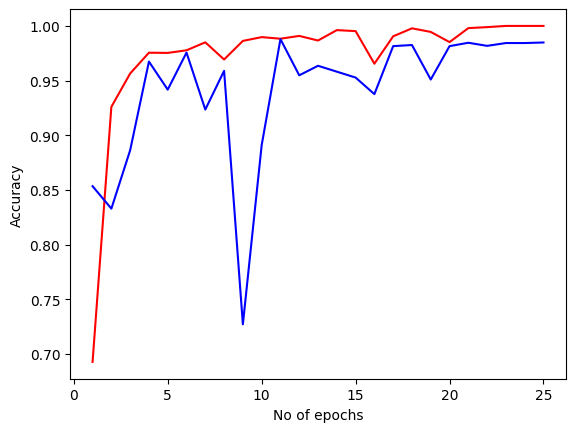

In [25]:
epochs = [i for i in range(1,26)]
plt.plot(epochs,training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy")
plt.show()

### Some Other Metrices

In [26]:
class_name = validation_set.class_names
class_name

['Azadirachta_indica',
 'Justicia_adhatoda',
 'Mentha_arvensis',
 'Moringa_oleifera',
 'Weed']

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical", #for main program change it to categorical
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 799 files belonging to 5 classes.


In [28]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 582ms/step


(array([[9.99999404e-01, 5.66158121e-07, 5.60149260e-08, 4.17227190e-11,
         2.47174761e-08],
        [9.99999762e-01, 2.95870080e-07, 4.13297023e-08, 4.75040059e-12,
         1.18986809e-09],
        [9.99999523e-01, 2.46807247e-07, 4.60868250e-08, 1.03519117e-10,
         2.23043003e-07],
        ...,
        [1.40648915e-08, 2.56683190e-08, 3.49099138e-10, 7.37665884e-09,
         1.00000000e+00],
        [1.42174755e-15, 5.25290471e-11, 3.08199164e-15, 1.09141090e-11,
         1.00000000e+00],
        [5.32293966e-11, 9.52750057e-08, 5.04619653e-12, 9.81523862e-10,
         9.99999881e-01]], dtype=float32),
 (799, 5))

In [29]:
predicted_categories = tf.argmax(y_pred, axis = 1) #axis = 1 horizontally(row wise)
predicted_categories

<tf.Tensor: shape=(799,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [30]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)  #axis = 0 vertically(column wise)
true_categories

<tf.Tensor: shape=(799, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [31]:
y_true = tf.argmax(true_categories, axis = 1)
y_true

<tf.Tensor: shape=(799,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

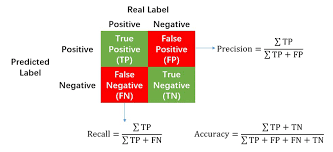

In [41]:
%pip install scikit-learn
from sklearn.metrics import classification_report,confusion_matrix

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 11.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.1 MB 10.5 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 8.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 9.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                    precision    recall  f1-score   support

Azadirachta_indica       0.99      0.99      0.99       198
 Justicia_adhatoda       0.99      1.00      1.00       161
   Mentha_arvensis       1.00      0.99      1.00       150
  Moringa_oleifera       1.00      1.00      1.00       153
              Weed       1.00      1.00      1.00       137

          accuracy                           1.00       799
         macro avg       1.00      1.00      1.00       799
      weighted avg       1.00      1.00      1.00       799



In [43]:
cm = confusion_matrix(y_true, predicted_categories)
cm, cm.shape

(array([[197,   1,   0,   0,   0],
        [  0, 161,   0,   0,   0],
        [  1,   0, 149,   0,   0],
        [  0,   0,   0, 153,   0],
        [  0,   0,   0,   0, 137]]),
 (5, 5))

### Confusion Matrix Visualization

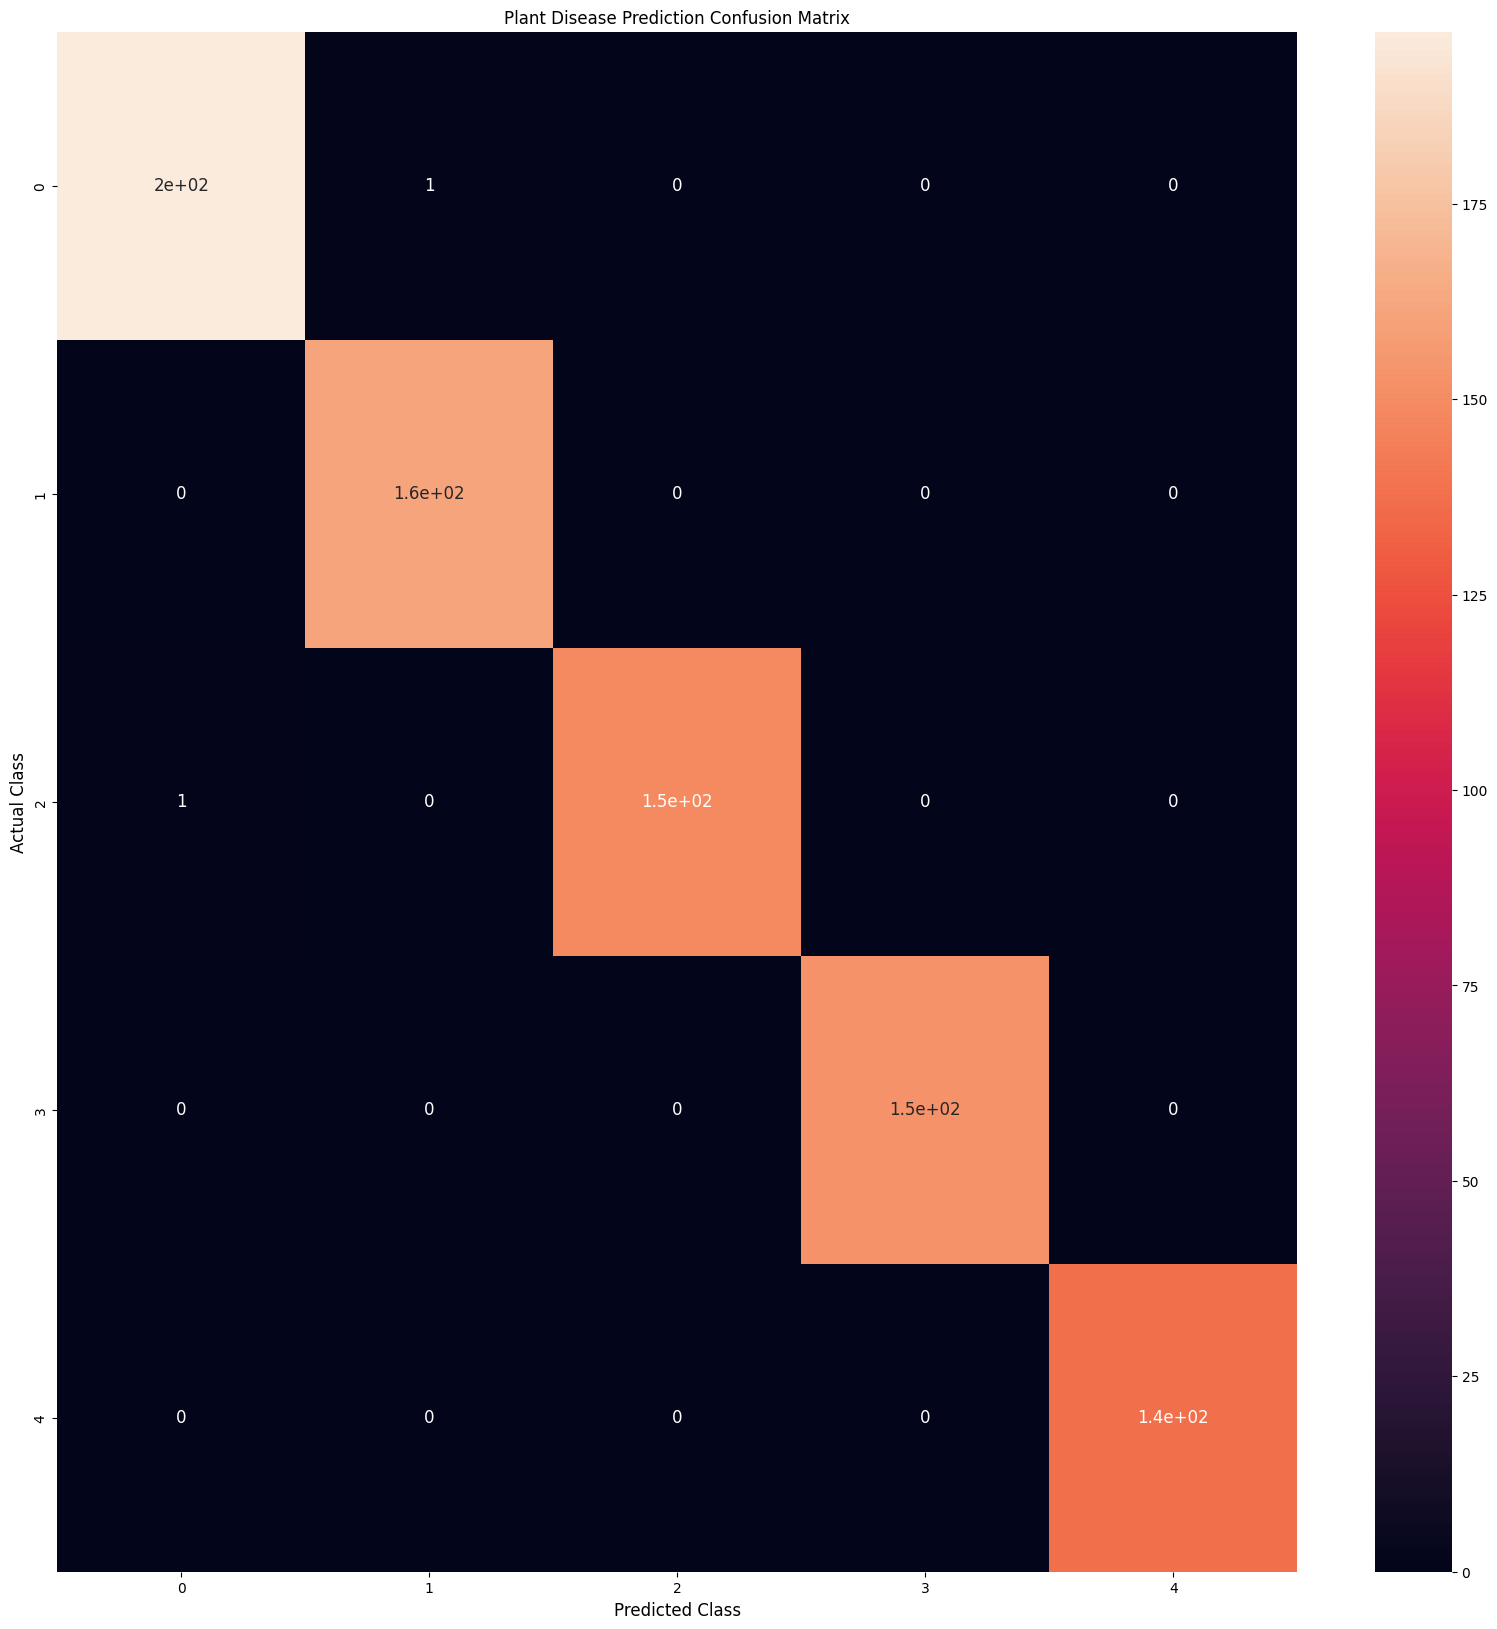

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, annot_kws={'size':12})
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Actual Class", fontsize = 12)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 12)
plt.show()